<a href="https://colab.research.google.com/github/TranMinhSang20104054/Tr-n-Minh-Sang-20104054/blob/main/gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
%cd /content/gdrive/MyDrive/Colab Notebooks/BTAI/gao

/content/gdrive/MyDrive/Colab Notebooks/BTAI/gao


In [8]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [9]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/BTAI/gao/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1500 images belonging to 5 classes.


In [10]:
validation=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/BTAI/gao/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 250 images belonging to 5 classes.


In [11]:
training_set.class_indices

{'Aborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [12]:
validation.class_indices

{'Aborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
47/47 [==============================] - 666s 14s/step - loss: 1.0339 - accuracy: 0.5980 - val_loss: 0.5163 - val_accuracy: 0.7520
Epoch 2/50
47/47 [==============================] - 15s 309ms/step - loss: 0.4750 - accuracy: 0.8080 - val_loss: 0.5505 - val_accuracy: 0.7640
Epoch 3/50
47/47 [==============================] - 15s 309ms/step - loss: 0.4448 - accuracy: 0.8020 - val_loss: 0.4380 - val_accuracy: 0.8040
Epoch 4/50
47/47 [==============================] - 16s 331ms/step - loss: 0.4259 - accuracy: 0.8240 - val_loss: 0.4171 - val_accuracy: 0.8040
Epoch 5/50
47/47 [==============================] - 15s 310ms/step - loss: 0.3856 - accuracy: 0.8327 - val_loss: 0.3575 - val_accuracy: 0.8400
Epoch 6/50
47/47 [==============================] - 15s 309ms/step - loss: 0.3953 - accuracy: 0.8453 - val_loss: 0.3984 - val_accuracy: 0.8200
Epoch 7/50
47/47 [==============================] - 15s 309ms/step - loss: 0.3613 - accuracy: 0.8493 - val_loss: 0.3594 - val_accuracy: 0.8160


In [15]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.015672504901885986
Train Accuracy 0.9953333139419556


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [16]:
model.save("gao.h5")

In [17]:
model_CNN=load_model('gao.h5')

1/1 [==============================] - 0s 347ms/step
Aborio


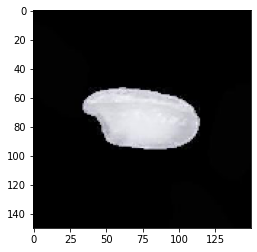

1/1 [==============================] - 0s 21ms/step
Aborio


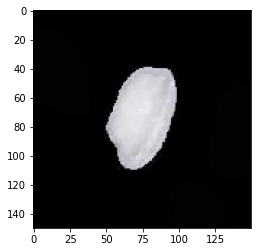

1/1 [==============================] - 0s 19ms/step
Aborio


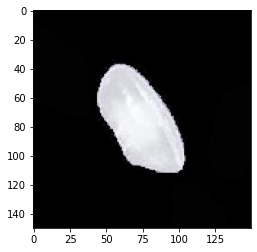

1/1 [==============================] - 0s 16ms/step
Aborio


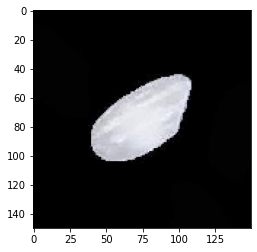

1/1 [==============================] - 0s 18ms/step
Aborio


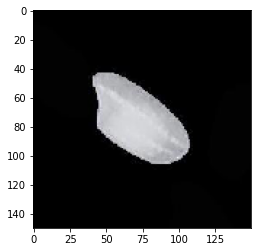

1/1 [==============================] - 0s 19ms/step
Basmati


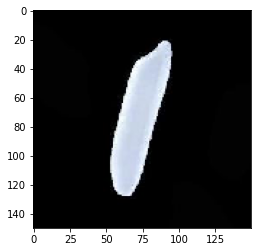

1/1 [==============================] - 0s 18ms/step
Basmati


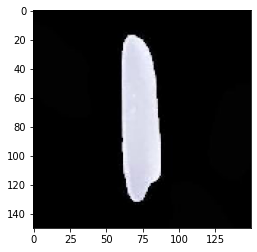

1/1 [==============================] - 0s 18ms/step
Basmati


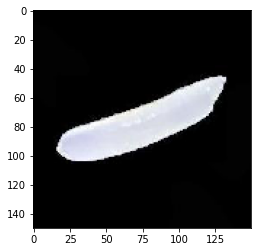

1/1 [==============================] - 0s 23ms/step
Basmati


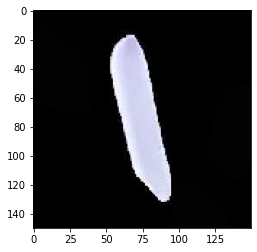

1/1 [==============================] - 0s 19ms/step
Basmati


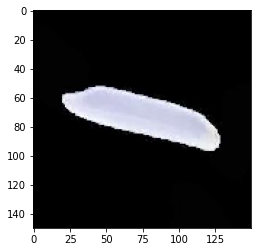

1/1 [==============================] - 0s 18ms/step
Ipsala


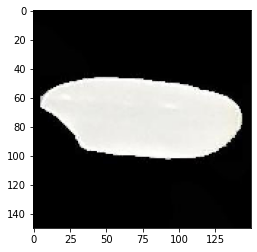

1/1 [==============================] - 0s 17ms/step
Ipsala


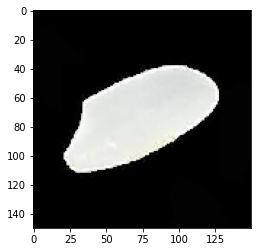

1/1 [==============================] - 0s 17ms/step
Ipsala


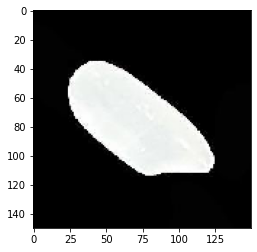

1/1 [==============================] - 0s 18ms/step
Ipsala


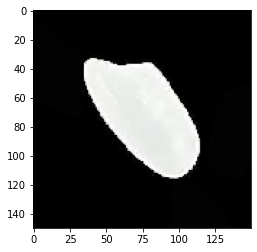

1/1 [==============================] - 0s 20ms/step
Ipsala


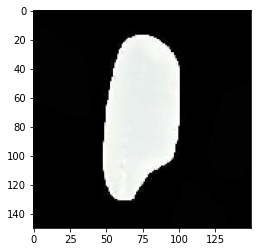

1/1 [==============================] - 0s 19ms/step
Jasmine


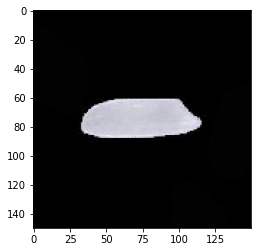

1/1 [==============================] - 0s 18ms/step
Jasmine


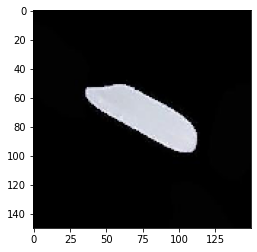

1/1 [==============================] - 0s 20ms/step
Jasmine


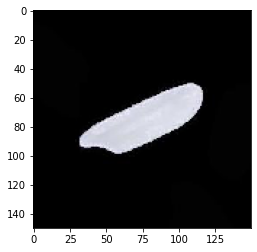

1/1 [==============================] - 0s 18ms/step
Jasmine


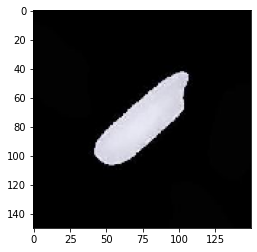

1/1 [==============================] - 0s 17ms/step
Jasmine


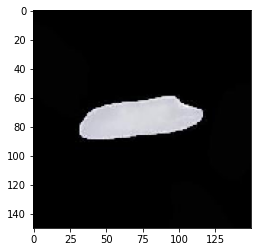

1/1 [==============================] - 0s 18ms/step
Karacadag


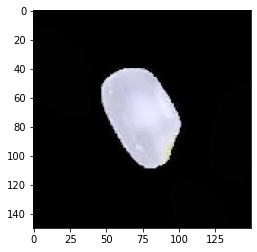

1/1 [==============================] - 0s 17ms/step
Karacadag


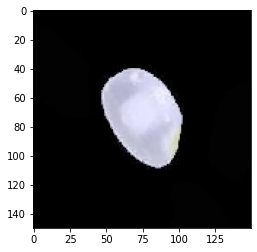

1/1 [==============================] - 0s 23ms/step
Karacadag


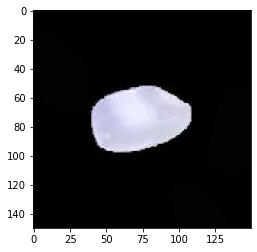

1/1 [==============================] - 0s 19ms/step
Karacadag


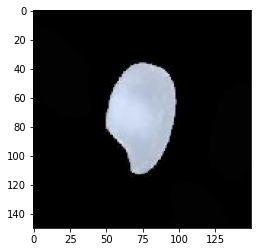

1/1 [==============================] - 0s 17ms/step
Karacadag


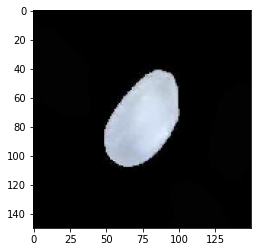

In [18]:
test="/content/gdrive/MyDrive/Colab Notebooks/BTAI/gao/Test/"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Aborio'
  if round(result[0][1])==1:
    prediction='Basmati'
  if round(result[0][2])==1:
    prediction='Ipsala'
  if round(result[0][3])==1:
    prediction='Jasmine'
  if round(result[0][4])==1:
    prediction='Karacadag'
  print(prediction)
  plt.show()